<a href="https://colab.research.google.com/github/BrianChegeGichau/footballscorespredictions/blob/master/Week6Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [2]:
#Importing the pandas dataset
import pandas as pd

In [3]:
#Importing the ranking data and the results data to our notebook
fifa = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')

In [4]:
#Previewing the first few rows of the ranking dataset
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
#Previewing the first few results 
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
#Basic statistics of the ranking dataset
fifa.describe()
#Our ranking dataset has 57,793 rows

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [7]:
#Previewing basic statistics of the results data
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# Data Cleaning

We have to merge the two dataset in order to get the ranks for the countries that participated. In order to do this I changed the column name of the home country to country full since they were all ranked in the ranking dataset, then change the away country to country full to also get the away team ranking details.

In [8]:
#Changing the column names of the results dataframe
results = results.rename(columns = {'home_team' : 'country_full'})

In [9]:
#Changing the datatype of the rank_date in the ranking dataframe and the date the match was played
#and the date in the results dataframe to a date time format
fifa['rank_date'] = pd.to_datetime(fifa['rank_date'])
results['date'] = pd.to_datetime(results['date'])

In [10]:
#I separated the dates to day, month and year for better analysis
fifa['day'] = fifa['rank_date'].dt.day
fifa['month'] = fifa['rank_date'].dt.month
fifa['year'] = fifa['rank_date'].dt.year

results['day'] = results['date'].dt.day
results['month'] = results['date'].dt.month
results['year'] = results['date'].dt.year

I merged the dataset using the day, month and year in order the exact ranking details of the home team when it played since it was observed the ranking details change frequently.

In [11]:
#I then merged the results dataframe to the fifa dataset by the country, month,year and day
home_team = results.merge(fifa, how = 'left', right_on = ['country_full','month','year','day'], left_on=['country_full','month','year','day'])

In [12]:
#Previewing the details of the home team
home_team.head()

,date,country_full,away_team,home_score,away_score,tournament,city,country,neutral,day,month,year,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,30,11,1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,8,3,1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,7,3,1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,6,3,1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,4,3,1876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [13]:
#It was observed that there were a number of missing values so I decided to drop them.
home_team = home_team.dropna()

In [14]:
#Previewing the dataset with dropped columns
home_team.head()

,date,country_full,away_team,home_score,away_score,tournament,city,country,neutral,day,month,year,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,8,1993,59.0,BOL,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,8,1993,8.0,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,8,1993,35.0,ECU,0.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,8,1993,65.0,GUI,0.0,23.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8,8,1993,67.0,PAR,0.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [15]:
#I then changed the home team to its original name
home_team = home_team.rename(columns = {'country_full' : 'home_team'})

In order to get the away team details, I also changed its names to country full to merge with the fifa dataset 

In [16]:
#Changing the column names
results = results.rename(columns = {'country_full' : 'home_team','away_team':'country_full'})

In [17]:
#Previewing the results data to view the changes
results.head()

,date,home_team,country_full,home_score,away_score,tournament,city,country,neutral,day,month,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,30,11,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,8,3,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,7,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,6,3,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,4,3,1876


In [18]:
#I then perfromed a merge of the results dataset with the ranking dataset to get the away details
#This was done in the basis of the country, month, year, day to get the exact ranks of the teams during which
#the match was played.
away_team = results.merge(fifa, how = 'left', right_on = ['country_full','month','year','day'], left_on=['country_full','month','year','day'])

In [19]:
#Previewing our new dataframe
away_team.head()
#It is noted there are quite a number of missing values as well

,date,home_team,country_full,home_score,away_score,tournament,city,country,neutral,day,month,year,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,30,11,1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,8,3,1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,7,3,1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,6,3,1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,4,3,1876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [20]:
#Checking for the number of missing values since it also had ranks as part of the missing values
#I decided to drop them
away_team.isnull().sum()

date                           0
home_team                      0
country_full                   0
home_score                     0
away_score                     0
tournament                     0
city                           0
country                        0
neutral                        0
day                            0
month                          0
year                           0
rank                       39906
country_abrv               39906
total_points               39906
previous_points            39906
rank_change                39906
cur_year_avg               39906
cur_year_avg_weighted      39906
last_year_avg              39906
last_year_avg_weighted     39906
two_year_ago_avg           39906
two_year_ago_weighted      39906
three_year_ago_avg         39906
three_year_ago_weighted    39906
confederation              39906
rank_date                  39906
dtype: int64

In [21]:
#Dropping the missing values in our away basis dataframe
away_team = away_team.dropna()

In [22]:
#Previewing the dataframe
away_team.head()

,date,home_team,country_full,home_score,away_score,tournament,city,country,neutral,day,month,year,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,8,1993,22.0,URU,0.0,47.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,8,1993,14.0,MEX,0.0,42.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,8,1993,94.0,VEN,0.0,4.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,8,1993,86.0,SLE,0.0,16.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8,8,1993,5.0,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [23]:
#I then reverted the dataframe names to its original name that is the away team
away_team = away_team.rename(columns = {'country_full' : 'away_team'})

In [24]:
#I merged the away team dataframe and home team dataframe to form the football dataframe on the basis of the date, 
#home team, away team and tournament to ensure I get the exact matches on their specific dates, tournaments
football = home_team.merge(away_team, how='left', left_on = ['date','home_team','away_team','tournament'],right_on = ['date','home_team','away_team','tournament'])

In [26]:
football.isnull().sum()

date                          0
home_team                     0
away_team                     0
home_score_x                  0
away_score_x                  0
tournament                    0
city_x                        0
country_x                     0
neutral_x                     0
day_x                         0
month_x                       0
year_x                        0
rank_x                        0
country_abrv_x                0
total_points_x                0
previous_points_x             0
rank_change_x                 0
cur_year_avg_x                0
cur_year_avg_weighted_x       0
last_year_avg_x               0
last_year_avg_weighted_x      0
two_year_ago_avg_x            0
two_year_ago_weighted_x       0
three_year_ago_avg_x          0
three_year_ago_weighted_x     0
confederation_x               0
rank_date_x                   0
home_score_y                 86
away_score_y                 86
city_y                       86
country_y                    86
neutral_

In [27]:
#There were a few missing values, since it also had the ranks as part of the missing data I decided to drop the mssing values 
football = football.dropna()

In [28]:
#Previewing our new dataframe
football.head()

,date,home_team,away_team,home_score_x,away_score_x,tournament,city_x,country_x,neutral_x,day_x,month_x,year_x,rank_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,home_score_y,away_score_y,city_y,country_y,neutral_y,day_y,month_y,year_y,rank_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,8,1993,59.0,BOL,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,3.0,1.0,La Paz,Bolivia,False,8.0,8.0,1993.0,22.0,URU,0.0,47.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,8,1993,8.0,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1.0,1.0,Maceió,Brazil,False,8.0,8.0,1993.0,14.0,MEX,0.0,42.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,8,1993,35.0,ECU,0.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5.0,0.0,Quito,Ecuador,False,8.0,8.0,1993.0,94.0,VEN,0.0,4.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,8,1993,65.0,GUI,0.0,23.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,1.0,0.0,Conakry,Guinea,False,8.0,8.0,1993.0,86.0,SLE,0.0,16.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8,8,1993,67.0,PAR,0.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1.0,3.0,Asunción,Paraguay,False,8.0,8.0,1993.0,5.0,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


Since the data had a lot of columns I will not be using for my analysis I decided to drop the columns. 

In [29]:
#Picking the columns of interest
column_names = ['home_team','home_score_x','away_team','away_score_x','year_x','rank_x','rank_y','tournament']
football = football.reindex(columns = column_names)

In [30]:
#Previewing the dataset
football.head()

,home_team,home_score_x,away_team,away_score_x,year_x,rank_x,rank_y,tournament
0,Bolivia,3,Uruguay,1,1993,59.0,22.0,FIFA World Cup qualification
1,Brazil,1,Mexico,1,1993,8.0,14.0,Friendly
2,Ecuador,5,Venezuela,0,1993,35.0,94.0,FIFA World Cup qualification
3,Guinea,1,Sierra Leone,0,1993,65.0,86.0,Friendly
4,Paraguay,1,Argentina,3,1993,67.0,5.0,FIFA World Cup qualification


In [31]:
#Renaming the columns to the correct format
football = football.rename(columns = {'home_score_x' : 'home_team_score','away_score_x' : 'away_team_score','year_x' : 'year','rank_x' : 'home_team_rank','rank_y' : 'away_team_rank'})

In [32]:
#Previewing the dataframe
football.head()

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament
0,Bolivia,3,Uruguay,1,1993,59.0,22.0,FIFA World Cup qualification
1,Brazil,1,Mexico,1,1993,8.0,14.0,Friendly
2,Ecuador,5,Venezuela,0,1993,35.0,94.0,FIFA World Cup qualification
3,Guinea,1,Sierra Leone,0,1993,65.0,86.0,Friendly
4,Paraguay,1,Argentina,3,1993,67.0,5.0,FIFA World Cup qualification


In [33]:
#Checking the datatypes of my new dataframe
football.dtypes

home_team           object
home_team_score      int64
away_team           object
away_team_score      int64
year                 int64
home_team_rank     float64
away_team_rank     float64
tournament          object
dtype: object

In [34]:
#Since i'll be using the year as a categorical variable I decided to change it to a string format
football['year'] = football['year'].astype(str)


I performed feature engineering in the dataset to know on the basis of the home team whether it was a win or loss and also to get the Match, and the total scores in the game

In [35]:
#Creating a new column for the match results
football.loc[football['home_team_score'] < football['away_team_score'] ,'game_results'] = 'Lose'
football.loc[football['home_team_score'] > football['away_team_score'], 'game_results'] = 'Win'
football.loc[football['home_team_score'] == football['away_team_score'], 'game_results'] = 'Draw'

In [38]:
#Getting the total scores in a game
football['total_scores'] = football['home_team_score'] + football['away_team_score']

In [39]:
#Getting the match for further analysis
football['match'] = football['home_team'] + ' Vs ' + football['away_team']

In [40]:
#Previewing the final dataframe ready for analysis.
football.head()

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament,game_results,total_scores,match
0,Bolivia,3,Uruguay,1,1993,59.0,22.0,FIFA World Cup qualification,Win,4,Bolivia Vs Uruguay
1,Brazil,1,Mexico,1,1993,8.0,14.0,Friendly,Draw,2,Brazil Vs Mexico
2,Ecuador,5,Venezuela,0,1993,35.0,94.0,FIFA World Cup qualification,Win,5,Ecuador Vs Venezuela
3,Guinea,1,Sierra Leone,0,1993,65.0,86.0,Friendly,Win,1,Guinea Vs Sierra Leone
4,Paraguay,1,Argentina,3,1993,67.0,5.0,FIFA World Cup qualification,Lose,4,Paraguay Vs Argentina


# Data Analysis

In [43]:
# I used the inbuilt pandasprofile function to get a general data preview and analysis
from pandas_profiling import ProfileReport
ProfileReport(football)
#Below is the general data anlysis of our dataset

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,871
Total Missing (%),0.0%
Total size in memory,81.8 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


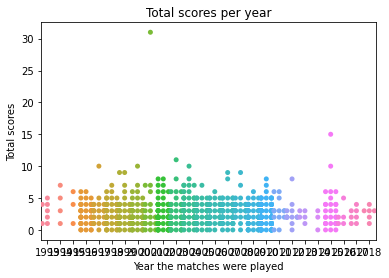

In [37]:
#Visualizing the goals scored over the years
import seaborn as sns
import matplotlib.pyplot as plt

sns.swarmplot(x='year', y='total_scores', data=football)
plt.xlabel('Year the matches were played')
plt.ylabel("Total scores")
plt.title('Total scores per year')
plt.show()

There seems to be a general goal scoring over the years.

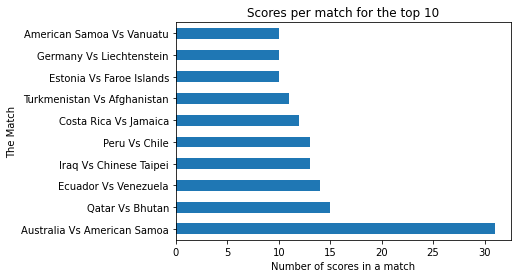

In [38]:
#Previewing the match that had the highest scores 
football.groupby('match')['total_scores'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel('Number of scores in a match')
plt.ylabel('The Match')
plt.title('Scores per match for the top 10')
plt.show()

Australia vs American Samoa had the highest goals in one match with slightly over 30 goals which is very weird.

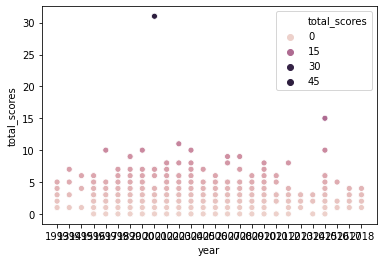

In [39]:
#Checking the goals scored over the years
scat=sns.scatterplot( x='year',y='total_scores',hue='total_scores' ,data=football)

There seems to be one year that had an almost extreme case of goal scoring showing it was an outlier. I decided not to drop the outlier since it will be useful in my analysis to get to know the team that was that defeated.

In [42]:
#Copying the football dataframe to maintain the original dataframe intact
df = football.copy()

# Polynomial Regression

Since most of our data were strings, I decided to encode the string values for better analysis. 

In [43]:
#Downloading the necessary libraries followed by the encoding of the string columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(df['home_team'])
df['home_team'] = label_encoder.transform(df['home_team'])

In [44]:
label_encoder.fit(df['away_team'])
df['away_team'] = label_encoder.transform(df['away_team'])

In [45]:
label_encoder.fit(df['tournament'])
df['tournament'] = label_encoder.transform(df['tournament'])

In [46]:
label_encoder.fit(df['game_results'])
df['game_results'] = label_encoder.transform(df['game_results'])

In [47]:
label_encoder.fit(df['match'])
df['match'] = label_encoder.transform(df['match'])

In [48]:
label_encoder.fit(df['year'])
df['year'] = label_encoder.transform(df['year'])

In [50]:
#previeweing the dataframe
df.head()

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament,game_results,total_scores,match
0,20,3,150,1,0,59.0,22.0,16,2,4,83
1,23,1,90,1,0,8.0,14.0,17,0,2,92
2,40,5,153,0,0,35.0,94.0,16,2,5,188
3,59,1,125,0,0,65.0,86.0,17,2,1,279
4,111,1,7,3,0,67.0,5.0,16,1,4,521


Checking for multi - collinearity in our dataset. 

In [51]:
#Checking the correlations in our dataset
correlations = df.corr()
correlations

,home_team,home_team_score,away_team,away_team_score,home_team_rank,away_team_rank,tournament,game_results,total_scores,match
home_team,1.000000,-0.015449,0.029351,-0.042723,0.008096,0.069756,-0.077816,-0.005838,-0.037628,0.998904
home_team_score,-0.015449,1.000000,-0.074795,-0.132413,-0.043381,0.309322,-0.033968,0.458813,0.837344,-0.014057
away_team,0.029351,-0.074795,1.000000,0.042052,0.028516,-0.011164,-0.073116,-0.040782,-0.044898,0.038003
away_team_score,-0.042723,-0.132413,0.042052,1.000000,0.143060,-0.151524,-0.002145,-0.229481,0.430988,-0.044361
home_team_rank,0.008096,-0.043381,0.028516,0.143060,1.000000,0.534618,-0.102162,-0.066454,0.039409,0.012226
away_team_rank,0.069756,0.309322,-0.011164,-0.151524,0.534618,1.000000,-0.085372,0.204293,0.198028,0.074398
tournament,-0.077816,-0.033968,-0.073116,-0.002145,-0.102162,-0.085372,1.000000,-0.016007,-0.032106,-0.079166
game_results,-0.005838,0.458813,-0.040782,-0.229481,-0.066454,0.204293,-0.016007,1.000000,0.291125,-0.005770
total_scores,-0.037628,0.837344,-0.044898,0.430988,0.039409,0.198028,-0.032106,0.291125,1.000000,-0.037264
match,0.998904,-0.014057,0.038003,-0.044361,0.012226,0.074398,-0.079166,-0.005770,-0.037264,1.000000


The VIF score is used to check the variation inflation factor to check whether columns are multi collinear

In [52]:
#Calculating the VIF Score 
import numpy as np
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)
#

,home_team,home_team_score,away_team,away_team_score,home_team_rank,away_team_rank,tournament,game_results,total_scores,match
home_team,479.439124,-8.756104e-01,4.187524,-1.959106e+00,1.299190,1.284940,-0.066546,-0.544360,1.798218e+00,-479.225099
home_team_score,-0.875253,5.488964e+13,0.049054,3.325390e+13,0.276728,-0.394773,0.028590,-0.157232,-6.029352e+13,0.892523
away_team,4.187524,4.914212e-02,1.050333,-5.933911e-02,-0.001482,0.010443,0.071971,-0.004005,3.366235e-02,-4.218630
away_team_score,-1.959164,3.325390e+13,-0.059312,2.014628e+13,-0.338196,0.373934,-0.006473,0.429099,-3.652774e+13,1.972277
home_team_rank,1.299190,2.781973e-01,-0.001482,-3.373062e-01,1.628580,-1.024956,0.092680,0.106971,2.553215e-02,-1.243513
away_team_rank,1.284940,-3.971683e-01,0.010443,3.724830e-01,-1.024956,1.791988,0.020190,-0.135580,-1.055567e-01,-1.396895
tournament,-0.066546,2.848148e-02,0.071971,-6.538929e-03,0.092680,0.020190,1.023880,0.004639,8.883499e-03,0.142627
game_results,-0.544360,-1.527941e-01,-0.004005,4.317877e-01,0.106971,-0.135580,0.004639,1.326626,-4.213062e-01,0.562024
total_scores,1.798563,-6.029352e+13,0.033479,-3.652774e+13,0.027146,-0.108188,0.008764,-0.416431,6.622941e+13,-1.764810
match,-479.225099,8.925229e-01,-4.218630,1.972277e+00,-1.243513,-1.396895,0.142627,0.562024,-1.764810e+00,480.028346


In [53]:
rough_work = df.copy()

I found the home team score and the away team score are highly multi collinear. Since it won't be used in the training, I dropped them.

In [54]:
revise = rough_work.drop(columns = ['home_team_score','away_team_score','match'])
correlations = revise.corr()

In [55]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)

,home_team,away_team,home_team_rank,away_team_rank,tournament,game_results,total_scores
home_team,1.015928,-0.024036,0.057832,-0.109709,0.075846,0.016647,0.054183
away_team,-0.024036,1.009860,-0.034737,0.025611,0.072147,0.024174,0.036012
home_team_rank,0.057832,-0.034737,1.478714,-0.848308,0.085976,0.261070,0.037086
away_team_rank,-0.109709,0.025611,-0.848308,1.566326,0.029299,-0.321585,-0.185161
tournament,0.075846,0.072147,0.085976,0.029299,1.023496,0.011834,0.026318
game_results,0.016647,0.024174,0.261070,-0.321585,0.011834,1.167080,-0.284280
total_scores,0.054183,0.036012,0.037086,-0.185161,0.026318,-0.284280,1.122467


In [80]:
#Defining the X and Y values which will be used to train and test our polynomial model.
#Importing the necessary libraries
from sklearn.preprocessing import PolynomialFeatures

X = df[['home_team_rank','away_team_rank','tournament']].values
y = df['home_team_score'].values

In [81]:
#Splitting the train and test data. I chose a 30% test size since it will be efficient
from sklearn.model_selection import train_test_split

X_train, X_test, home_train, home_test = train_test_split(X , y, test_size=0.3, random_state = 50)

In [82]:
#Standardizing our data
#Importing the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model as LinearRegression 

#Standardizing our data
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)
#I chose degree one since it brought better results compared to others
poly_reg = PolynomialFeatures(degree = 1)
#Fitting our data
X_train = poly_reg.fit_transform(X_train)
X_test = poly_reg.fit_transform(X_test)
#Training our data
pol_reg = LinearRegression()
pol_reg.fit(X_train,home_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
#Predicting our data
home_predict = pol_reg.predict(X_test)

In [84]:
#Getting the RMSE of our data
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(home_test,home_predict))

1.4778206790835422

The RMSE Was fairly small hence our model was accurate

Away team prediction

In [62]:
#Defining the X and y for analysis
X_away = df[['home_team_rank','away_team_rank','tournament']].values
y_away = df['away_team_score'].values

In [63]:
#Splitting the dataset
X_train_away, X_test_away, away_train, away_test = train_test_split(X_away , y_away, test_size=0.4, random_state = 50)

In [67]:
#Standardizing our data
feature_scaler = StandardScaler()
X_train_away = feature_scaler.fit_transform(X_train_away)
X_test_away = feature_scaler.transform(X_test_away)
#I used degree one since it brought better results
poly_reg = PolynomialFeatures(degree = 1)
#Fitting the dataframe in our regression
X_train_away = poly_reg.fit_transform(X_train_away)
X_test_away = poly_reg.fit_transform(X_test_away)
#Training our data
pol_reg = LinearRegression()
pol_reg.fit(X_train_away,away_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
#Predicting our data for the away teams
away_predict = pol_reg.predict(X_test_away)

Our model seems to be fairly accurate with a low RMSE of 1.704

In [69]:
#Getting the RMSE
np.sqrt(mean_squared_error(away_test,away_predict))

1.7045578861849995

Kfold

Its important to get different views of the data therefore we used cross validation

In [74]:
#Importing the necessary libraries
from sklearn.model_selection import KFold
from sklearn import metrics

In [77]:
#Getting the views of 700 hundred ways our data can be and gettig our average RMSE
folds = KFold(n_splits=700)

print('Used ' + str(folds.get_n_splits(X_away)) + ' folds')

RMSE = []
count = 0

for train_index, test_index in folds.split(X_away):
  X_train_away, X_test_away = X_away[train_index],X_away[test_index]
  away_train, away_test = y_away[train_index],y_away[test_index]

  regression = LinearRegression()
  regression.fit(X_train_away, away_train)

  away_predict = regression.predict(X_test_away)
  rmse_value = np.sqrt(metrics.mean_squared_error(away_test, away_predict))
  RMSE.append(rmse_value)
  count = count + 1
print('Trained ' + str(count) + ' models')
np.mean(RMSE)  

Used 700 folds
Trained 700 models


0.8378849094070574

I found an RMSE of 0.8378 for our away prediction model. Which contrasts with the 1.704 which means we could tune our data to get a better result.

I perfromed a bartlett test to find out whether the data had homogenous variances

In [86]:
#Calculating the paramters to check for the homogeinity of our home score prediction model.
import scipy as sp

residuals = np.subtract(home_predict, home_test)

pd.DataFrame(residuals).describe()

residuals.mean()

test_result, p_value = sp.stats.bartlett(home_predict, residuals)

degree_of_freedom = len(home_predict) - 1

probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
    print('There are patterns to the variance of the data')
if (test_result < critical_value):
  print('The variance is homogenous across our data')     

The variance is homogenous across our data


Our model is up to par and doesn't need to be reassesed.

# Logistic Regression

I also performed a Logistic Regression on our data to be able to predict whether the a game is likely to win, lose or draw.

In [89]:
df.head()

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament,game_results,total_scores,match
0,20,3,150,1,0,59.0,22.0,16,2,4,83
1,23,1,90,1,0,8.0,14.0,17,0,2,92
2,40,5,153,0,0,35.0,94.0,16,2,5,188
3,59,1,125,0,0,65.0,86.0,17,2,1,279
4,111,1,7,3,0,67.0,5.0,16,1,4,521


In [96]:
#Defining the predictive variable which is the game results
XLog = df.drop(['game_results'],axis=1).values
ylog = df['game_results'].values

In [100]:
#Splitting our data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(XLog, ylog, test_size=0.3,random_state=25)

In [102]:
#Fitting our data in a logistic regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train_log,y_train_log)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
#Predicting the result of of our test data
y_predict_log = LogReg.predict(X_test_log)

In [105]:
#Creating a confusion matrix to get the accuracy of our model.
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test_log,y_predict_log)
confusion_matrix

array([[ 31,  16,  23],
       [ 10,  52,   1],
       [ 17,   0, 112]])

In [123]:
LogReg.score(X_test_log, y_test_log)

0.7442748091603053

Our Logistic Regression had an accuracy of 74% which can be made better using hyperparameters.

I therefore decided to use the Random Search to get the best parameters of the Logistic Regression Model. This is because of the cheaper computing power that comes with Random Search

In [107]:
#Importing the RandomForestClassifier which will be used for cross validation.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, random_state=0)

Cross Validating our model

In [109]:
#Cross Validating our data
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator = classifier, X = X_train_log, y=y_train_log,cv=5)
print(all_accuracies.mean())

0.991749085489771


The data had ana ccuracy of 99% upon cross validation

Doing the hyper parameter tuning

In [116]:
#Importing the necessary libararies
from scipy.stats import randint as sp_randint

In [117]:
#Creating a dictionary for the hyper parameters
param_dist = {
    'max_depth' : [3,None],
    'max_features' : sp_randint(1,11),
    'min_samples_split' : sp_randint(2,11),
    'bootstrap' : [True, False],
    'criterion' : ['gini','entropy']
}

In [118]:
#Fitting the hyperparamters on the Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_sr = RandomizedSearchCV(classifier, param_dist, cv=5)

In [119]:
#Fitting our data on the hyperparamters
random_sr.fit(X_train_log,y_train_log)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [120]:
#Getting the best parameters
best_parameter = random_sr.best_params_
print(best_parameter)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_split': 8}


Gini is the best paramter while a min samples split of 8 is needed to get the best model.

In [121]:
best_result = random_sr.best_score_
print(best_result)

0.991749085489771


Our model's accuracy rose from 74% to a 99% accuaracy upon applying hyperparameters.

# Challenging the Solution

More data modelling procedures is required upon gaining the knowledge.  
Better data collection procedures need to be implemented to enable better predictions